# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [31]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
sum_dwelling_types = to_data.groupby("year")["single_detached_house","apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex","apartment_five_storeys_less","other_house"].sum()
sum_dwelling_types.head()


C:\Users\Admin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [5]:
# Save the dataframe as a csv file
sum_dwelling_types.to_csv(r'sum_dwelling_types.csv')

In [6]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """

<AxesSubplot:title={'center':'Dwelling Types in Toronto in 2001'}, xlabel='Dwelling Type Units', ylabel='2001'>

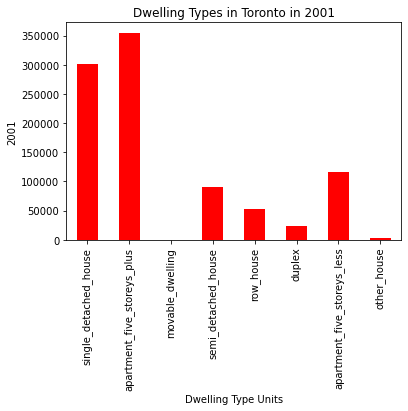

In [7]:
# Create a bar chart per year to show the number of dwelling types
row_2001 = sum_dwelling_types.iloc[0]
row_2006 = sum_dwelling_types.iloc[1]
row_2011 = sum_dwelling_types.iloc[2]
row_2016 = sum_dwelling_types.iloc[3]
# Bar chart for 2001
row_2001.plot.bar(title="Dwelling Types in Toronto in 2001", xlabel="Dwelling Type Units", ylabel="2001", color="red")

<AxesSubplot:title={'center':'Dwelling Types in Toronto in 2001'}, xlabel='Dwelling Type Units', ylabel='2001'>

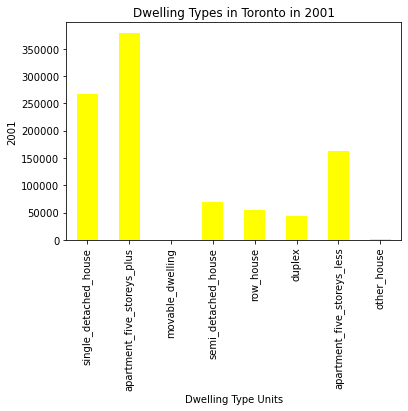

In [8]:
# Bar chart for 2006
row_2006.plot.bar(title="Dwelling Types in Toronto in 2001", xlabel="Dwelling Type Units", ylabel="2001", color="yellow")

<AxesSubplot:title={'center':'Dwelling Types in Toronto in 2001'}, xlabel='Dwelling Type Units', ylabel='2001'>

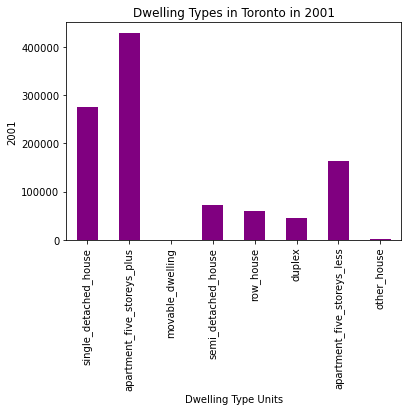

In [9]:
# Bar chart for 2011
row_2011.plot.bar(title="Dwelling Types in Toronto in 2001", xlabel="Dwelling Type Units", ylabel="2001", color="purple")

<AxesSubplot:title={'center':'Dwelling Types in Toronto in 2001'}, xlabel='Dwelling Type Units', ylabel='2001'>

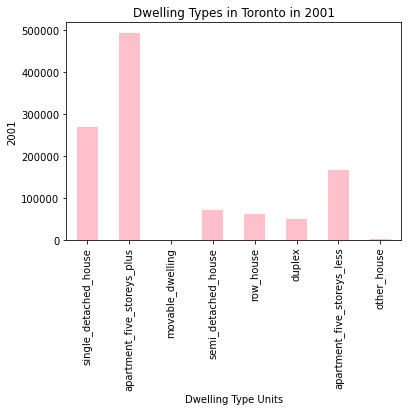

In [10]:
# Bar chart for 2016
row_2016.plot.bar(title="Dwelling Types in Toronto in 2001", xlabel="Dwelling Type Units", ylabel="2001", color="pink")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculate the average monthly shelter costs for owned and rented dwellings
monthly_shelter_avg = to_data.groupby("year")["shelter_costs_owned","shelter_costs_rented"].mean()
monthly_shelter_avg.head()

C:\Users\Admin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [12]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """

<AxesSubplot:title={'center':'Average Monthly Shelter Cost for Owned Dwellings in Toronto'}, xlabel='Year', ylabel='Cost'>

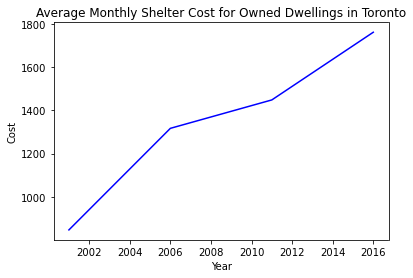

In [13]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
avg_owned = monthly_shelter_avg["shelter_costs_owned"]
avg_owned.plot(title="Average Monthly Shelter Cost for Owned Dwellings in Toronto", xlabel="Year", ylabel="Cost", color="blue")


<AxesSubplot:title={'center':'Average Monthly Shelter Cost for Rented Dwellings in Toronto'}, xlabel='Year', ylabel='Cost'>

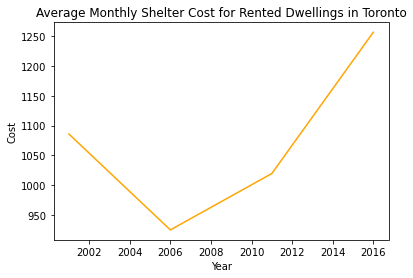

In [14]:
# Line chart for rented dwellings
avg_owned = monthly_shelter_avg["shelter_costs_rented"]
avg_owned.plot(title="Average Monthly Shelter Cost for Rented Dwellings in Toronto", xlabel="Year", ylabel="Cost", color="orange")

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [15]:
# Calculate the average house value per year
avg_value = to_data.groupby("year")["average_house_value","other_house"].mean()
avg_value.head()

C:\Users\Admin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


average_house_value  other_house
year                                  
2001        289882.885714    21.714286
2006        424059.664286     9.535714
2011        530424.721429    15.464286
2016        664068.328571    20.321429

<AxesSubplot:title={'center':'Average House Value in Toronto'}, xlabel='Year', ylabel='2001'>

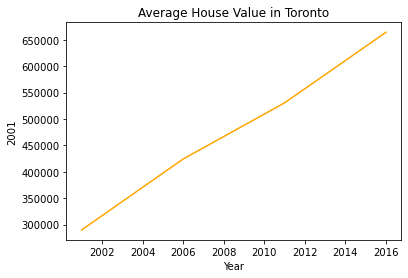

In [16]:
# Plot the average house value per year as a line chart
avg_value_house = avg_value["average_house_value"]
avg_value_house.plot(title="Average House Value in Toronto", xlabel="Year", ylabel="2001", color="orange")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [17]:
# Create a new DataFrame with the mean house values by neighbourhood per year
neighbourhood_value = (to_data.reset_index().groupby(['year','neighbourhood',"average_house_value"],as_index=False).mean())
neighbourhood_value.head()

year                 neighbourhood  average_house_value  \
0  2001               Agincourt North               200388   
1  2001  Agincourt South-Malvern West               203047   
2  2001                     Alderwood               259998   
3  2001                         Annex               453850   
4  2001             Banbury-Don Mills               371864   

   single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
0                 3715.0                       1480.0               0.0   
1                 3250.0                       1835.0               0.0   
2                 3175.0                        315.0               0.0   
3                 1060.0                       6090.0               5.0   
4                 3615.0                       4465.0               0.0   

   semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
0               1055.0     1295.0   195.0                        185.0   
1                545.0      455.0   105.0                        425.0   
2                470.0       50.0   185.0                        370.0   
3               1980.0      605.0   275.0                       3710.0   
4                240.0      380.0    15.0                       1360.0   

   other_house  shelter_costs_owned  shelter_costs_rented  
0          5.0                810.0                 870.0  
1          0.0                806.0                 892.0  
2          0.0                817.0                 924.0  
3        165.0               1027.0                1378.0  
4          0.0               1007.0                1163.0

In [18]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
neighbourhood_value.hvplot(label='Average House Price for',
                       x='year',
                       y='average_house_value', 
                       xlabel='Year',
                       ylabel='Average House Value', 
                       groupby='neighbourhood')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [19]:
#Make df to reflect the average number of dwelling types for each suburb
dwelling_types = to_data.groupby([to_data.index, "neighbourhood"]).mean()
dwelling_types.head(10)

single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                              3715.0   
     Agincourt South-Malvern West                 3250.0   
     Alderwood                                    3175.0   
     Annex                                        1060.0   
     Banbury-Don Mills                            3615.0   
     Bathurst Manor                               2405.0   
     Bay Street Corridor                            10.0   
     Bayview Village                              2170.0   
     Bayview Woods-Steeles                        1650.0   
     Bedford Park-Nortown                         4985.0   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                    1480.0   
     Agincourt South-Malvern West                       1835.0   
     Alderwood                                           315.0   
     Annex                                              6090.0   
     Banbury-Don Mills                                  4465.0   
     Bathurst Manor                                     1550.0   
     Bay Street Corridor                                7575.0   
     Bayview Village                                     630.0   
     Bayview Woods-Steeles                              1715.0   
     Bedford Park-Nortown                               2080.0   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                            0.0               1055.0   
     Agincourt South-Malvern West               0.0                545.0   
     Alderwood                                  0.0                470.0   
     Annex                                      5.0               1980.0   
     Banbury-Don Mills                          0.0                240.0   
     Bathurst Manor                             0.0                130.0   
     Bay Street Corridor                        0.0                  0.0   
     Bayview Village                            0.0                170.0   
     Bayview Woods-Steeles                      0.0                925.0   
     Bedford Park-Nortown                       0.0                 45.0   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                  1295.0   195.0   
     Agincourt South-Malvern West      455.0   105.0   
     Alderwood                          50.0   185.0   
     Annex                             605.0   275.0   
     Banbury-Don Mills                 380.0    15.0   
     Bathurst Manor                    130.0   375.0   
     Bay Street Corridor                15.0     0.0   
     Bayview Village                   765.0    15.0   
     Bayview Woods-Steeles             105.0    10.0   
     Bedford Park-Nortown               40.0   210.0   

                                   apartment_five_storeys_less  other_house  \
year neighbourhood                                                            
2001 Agincourt North                                     185.0          5.0   
     Agincourt South-Malvern West                        425.0          0.0   
     Alderwood                                           370.0          0.0   
     Annex                                              3710.0        165.0   
     Banbury-Don Mills                                  1360.0          0.0   
     Bathurst Manor                                      745.0          0.0   
     Bay Street Corridor                                 240.0          0.0   
     Bayview Village                                     640.0          0.0   
     Bayview Woods-Steeles                               170.0          5.0   
     Bedford Park-Nortown                               1235.0    

In [20]:
# Fetch the data of all dwelling types per year
dwelling_types.hvplot(
    x='year',
    xlabel = 'Year',
    y=['single_detached_house', 
       'apartment_five_storeys_plus', 
       'movable_dwelling', 
       'semi_detached_house', 
       'row_house', 
       'duplex', 
       'apartment_five_storeys_less', 
       'other_house'
      ],
    ylabel = 'Dwelling Type Units',
    groupby = 'neighbourhood',
    kind = 'bar',
    stacked = False,
    rot = 90,
    width=900,
    height = 500
)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [21]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_types.hvplot(
    x='year',
    xlabel = 'Year',
    y='average_house_value',
    ylabel = 'Dwelling Types per Neighbourhood',
    groupby = 'neighbourhood',
    kind = 'bar',
    title= "Number of Dwelling types for each Neighbourhood",
    stacked = False)


:DynamicMap   [neighbourhood]
   :Bars   [year]   (average_house_value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [22]:
# Getting the data from the top 10 expensive neighbourhoods
# Calculate the average sale price
neighbourhood_avg_stats = (
    to_data.groupby(['neighbourhood'],as_index=False).mean()
)

# Calculate top ten neighborhoods by average sale price
top_neighbourhood_sale_price = (
    neighbourhood_avg_stats.nlargest(10, 'average_house_value').reset_index().drop(columns='index')
)

# Call DataFrame
top_neighbourhood_sale_price

neighbourhood  single_detached_house  \
0  Bridle Path-Sunnybrook-York Mills                2260.00   
1                  Forest Hill South                1742.50   
2                Lawrence Park South                3472.50   
3                Rosedale-Moore Park                2498.75   
4               St.Andrew-Windfields                3225.00   
5                          Casa Loma                 916.25   
6               Bedford Park-Nortown                4865.00   
7                  Forest Hill North                1488.75   
8                     Kingsway South                2326.25   
9                     Yonge-St.Clair                 565.00   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                       331.25              0.00                36.25   
1                      2031.25              1.25                61.25   
2                       773.75              0.00               126.25   
3                      4641.25              0.00               486.25   
4                      1670.00              0.00               185.00   
5                      2310.00              0.00               288.75   
6                      1981.25              0.00                43.75   
7                      3392.50              0.00                12.50   
8                       576.25              0.00                66.25   
9                      3948.75              0.00               425.00   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0      90.00    25.0                        40.00         0.00   
1      45.00    75.0                      1027.50         3.75   
2      38.75   225.0                       966.25        16.25   
3     245.00   327.5                      1618.75         2.50   
4     552.50    97.5                       586.25         5.00   
5     201.25   162.5                      1192.50         2.50   
6      57.50   287.5                      1275.00        88.75   
7      16.25    82.5                       402.50         1.25   
8      48.75    20.0                       336.25         2.50   
9     212.50   172.5                      1308.75         6.25   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0           1526485.75              2360.75               2321.75  
1           1195992.50              1781.00               1313.75  
2           1094027.75              1954.00               1372.75  
3           1093640.00              1909.75               1537.25  
4            999107.00              1880.25               1384.50  
5            981064.25              1873.75               1547.75  
6            930415.25              1786.75               1255.00  
7            851680.50              1722.75               1245.50  
8            843234.25              1736.75               1622.00  
9            813220.25              1680.75               1369.00

In [23]:
# Plotting the data from the top 10 expensive neighbourhoods
top_ten_title = 'The Top 10 most Expensive Neighbourhoods in Toronto'
top_neighbourhood_sale_price.hvplot.bar(
    rot=90,
    x='neighbourhood',
    y='average_house_value',
    width=900,
    height=600,
    color="darkblue",
    title=top_ten_title,
    xlabel='Neighbourhood',
    ylabel='Avg. Sale Price per Square Foot'
)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [24]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [25]:
# Calculate the mean values for each neighborhood
neighbourhood_mean = (
    to_data.groupby('neighbourhood',as_index=False).mean()
)

neighbourhood_mean.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [26]:
# Join the average values with the neighbourhood locations
neighbourhood_location=pd.merge(df_neighbourhood_locations,neighbourhood_mean, on='neighbourhood')
neighbourhood_location.head()

neighbourhood        lat        lon  single_detached_house  \
0               Agincourt North  43.805441 -79.266712                3435.00   
1  Agincourt South-Malvern West  43.788658 -79.265612                2897.50   
2                     Alderwood  43.604937 -79.541611                2903.75   
3                         Annex  43.671585 -79.404001                 751.25   
4             Banbury-Don Mills  43.737657 -79.349718                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

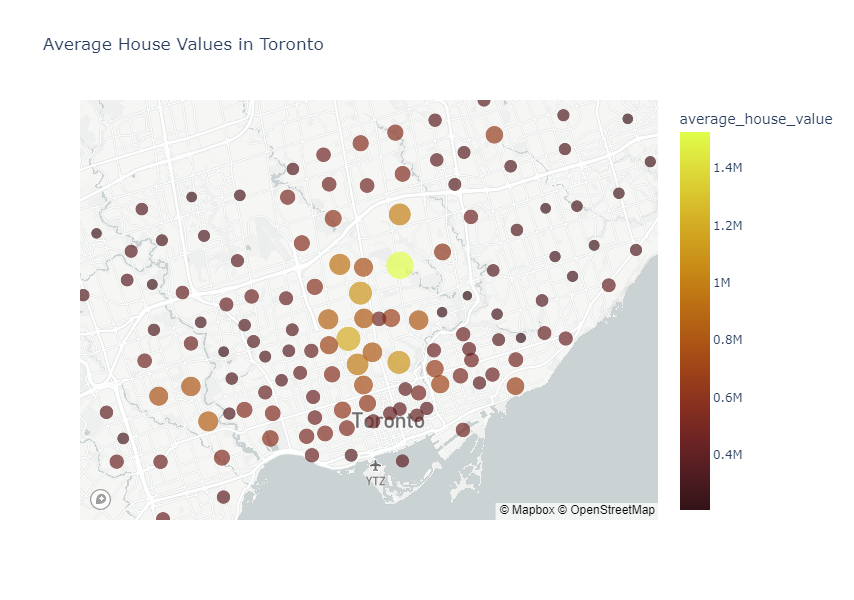

In [27]:
# Create a scatter mapbox to analyze neighbourhood info
px.set_mapbox_access_token(map_box_api)
px.scatter_mapbox(neighbourhood_location,
    lat='lat',
    lon='lon',
    size='average_house_value',
    color='average_house_value',
    hover_name='neighbourhood',
    color_continuous_scale=px.colors.sequential.solar,
    width=1500,
    height=600,
    zoom=10,
    title="Average House Values in Toronto"
)

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

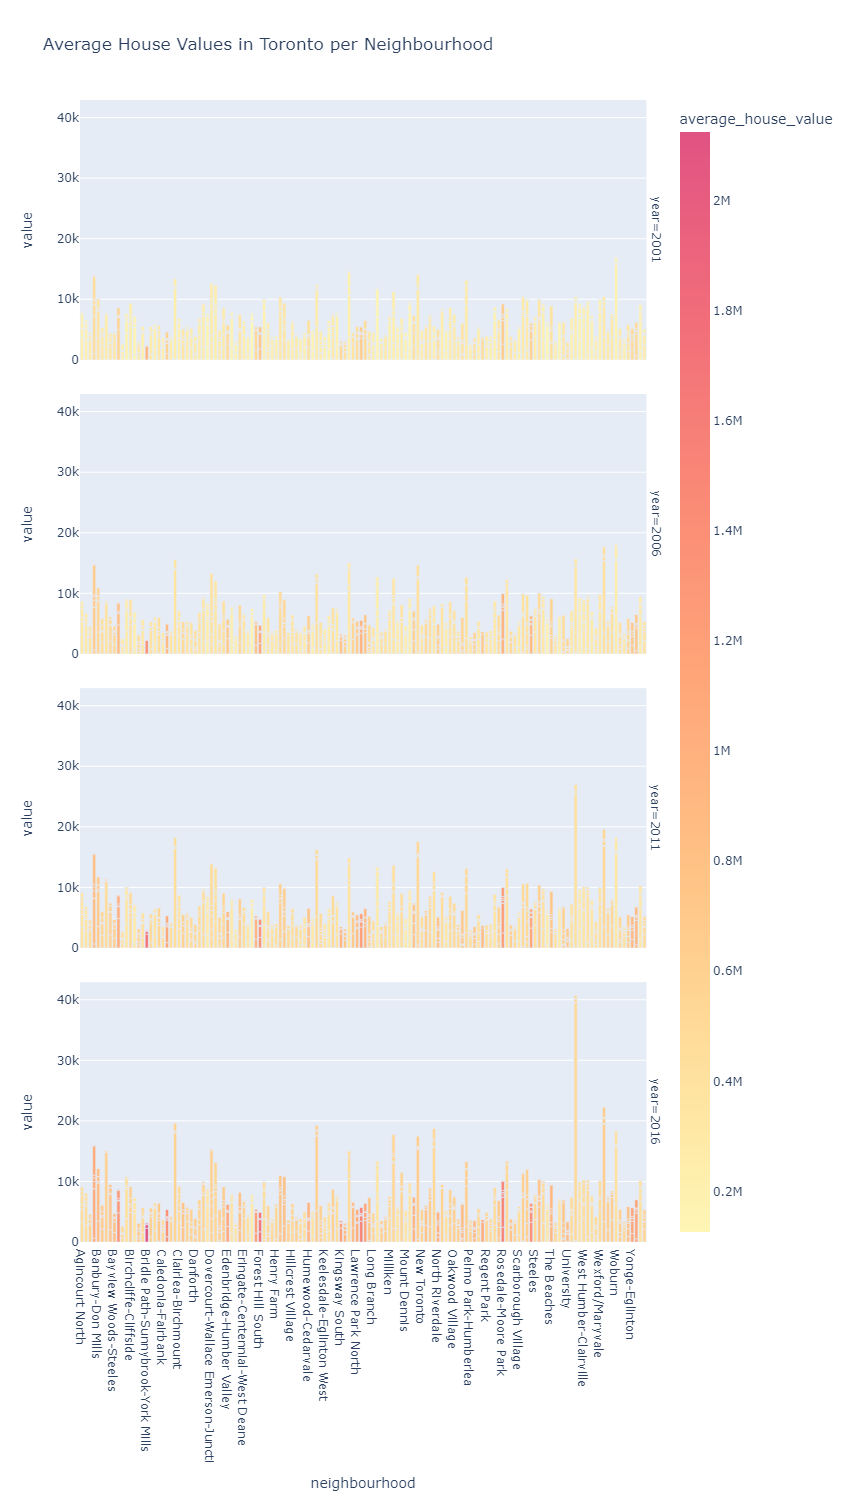

In [28]:
to_data.reset_index(level=0, inplace=True)
fig = px.bar(
    to_data,
    x="neighbourhood",
    y=['single_detached_house', 
       'apartment_five_storeys_plus', 
       'movable_dwelling', 
       'semi_detached_house', 
       'row_house', 
       'duplex', 
       'apartment_five_storeys_less', 
       'other_house'
      ],

    color="average_house_value",
    color_continuous_scale=px.colors.sequential.Pinkyl,
    facet_row = 'year',
    height = 1500,
    width = 1500,
    title = "Average House Values in Toronto per Neighbourhood"
)
fig.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [29]:
# Fetch the data from all expensive neighbourhoods per year.
most_expensive_homes = to_data.drop([
    'single_detached_house',
    'apartment_five_storeys_plus',
    'movable_dwelling',
    'semi_detached_house',
    'row_house', 'duplex',
    'apartment_five_storeys_less',
    'other_house',
    'average_house_value'
], axis = 1)

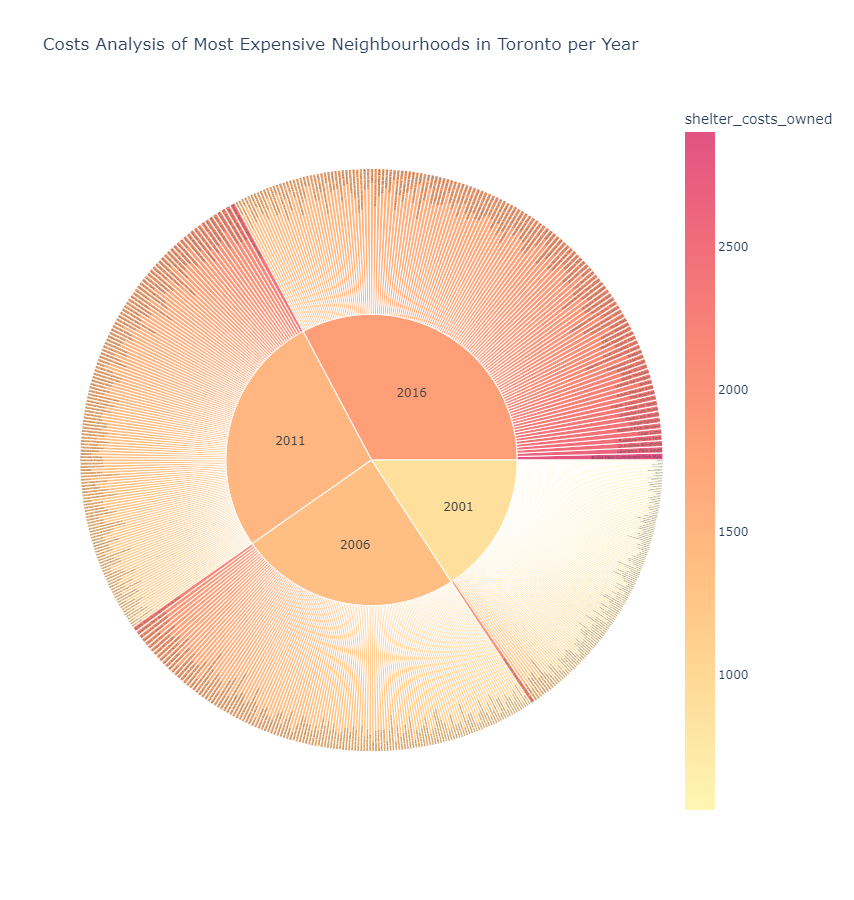

In [30]:
# Create the sunburst chart
fig = px.sunburst(most_expensive_homes,path=['year','neighbourhood'],
                  values='shelter_costs_owned',
                  color = 'shelter_costs_owned',
                  hover_data=['shelter_costs_owned', 'shelter_costs_rented'],
                  color_continuous_scale=px.colors.sequential.Pinkyl,
                  height = 900,
                  width = 900,
                  title = "Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year"
                 )

fig.show()